In this demonstration, we will progressively implement several data structures, culminating in an undirected graph equipped with common graph
algorithms.

The flow of implementations is as follows:

`LinkedList` -> `Stack` -> `Queue`

`Queue` + `Heap` + `Union-Find` -> `Graph`

Although Python has built-ins and libraries such as `list`,
`collections` and `heapq` that provide some of these functionalities,
we will implement them from scratch.

---
Now let's start with `LinkedList`.

In [ ]:
class Node():
    def __init__(self, data):
        self.data = data
        self.next = None

# LinkedList
class List():
    def __init__(self):
        self.head = None
        self.size = 0 

    # String representation
    def __str__(self):
        s = ''
        p = self.head
        while p:
            s += '%s -> ' % str(p.data)
            p = p.next
        return s[:-4]

    def is_empty(self):
        return not self.size

    def get_size(self):
        return self.size

    def insert(self, x): 
        if self.is_empty():
            self.head = Node(x)
        else:
            p = Node(x)
            self.head, p.next = p, self.head
        self.size += 1

    def delete(self):
        if self.is_empty():
            return
        p = self.head
        self.head = p.next
        self.size -= 1
        return p.data

l = List()
for i in range(10):
    l.insert(i)
print(l)


9 -> 8 -> 7 -> 6 -> 5 -> 4 -> 3 -> 2 -> 1 -> 0


Now we implement `Stack` based on `LinkedList`.

In [ ]:
class Stack(List):
    def __init__(self):
        super(Stack, self).__init__()

    def push(self, x): 
        self.insert(x)

    def pop(self):
        return self.delete()

    # Check the head element
    def peek(self):
        if self.is_empty():
            return
        return self.head.data

s = Stack()
for i in range(10):
    s.push(i)
for _ in range(3):
    print(s.pop())
print(s)

9
8
7
6 -> 5 -> 4 -> 3 -> 2 -> 1 -> 0


`Queue` will be implemented as two `Stacks`.

In [ ]:
class Queue():
    def __init__(self):
        self.s, self.t = Stack(), Stack()

    def __str__(self):
        t = str(self.t)
        # Reverse string representation in stack s
        s = ''
        p = self.s.head
        while p:
            s = '%s -> %s' % (p.data, s)
            p = p.next
        s = s[:-4]
        # When s and t are both non-empty, add a link between them
        if s and t:
            return t + ' -> ' + s
        return t + s

    def is_empty(self):
        return self.s.is_empty() and self.t.is_empty()

    def get_size(self):
        return self.s.get_size() + self.t.get_size()

    # Enqueue by pushing to stack s
    def enqueue(self, x):
        self.s.push(x)

    # Dequeue by poping from stack t
    def dequeue(self):
        if self.t.is_empty():
            if self.s.is_empty():
                return
            # Move s to t when t is empty
            while not self.s.is_empty():
                self.t.push(self.s.pop())
        return self.t.pop()

    # Check the front element of the queue
    def peek(self):
        if self.t.is_empty():
            if self.s.is_empty():
                return
            # Move s to t when t is empty
            while not self.s.is_empty():
                self.t.push(self.s.pop())
        return self.t.peek()

q = Queue()
for i in range(10):
    q.enqueue(i)
for _ in range(3):
    print(q.dequeue())
q.enqueue(10)
q.enqueue(11)
print(q)

0
1
2
3 -> 4 -> 5 -> 6 -> 7 -> 8 -> 9 -> 10 -> 11


Next, we implement `Min-Heap` as a binary heap whose elements are $(key, value)$ pairs. In order to facilitate implementation of Dijkstra's algorithm
later, extra methods are needed such as to decrease the $key$ of a given $value$.

In [ ]:
# Helper functions to get parent and child index in binary heap
def _parent(x):
    if x == 0:
        return x
    return (x - 1) // 2
 
def _left(x):
    return 2 * x + 1
 
def _right(x):
    return 2 * x + 2
 
# Min-heap implemented as a binary heap
# Elements are (key, value) pairs to facilitate implementation of
# Dijkstra's algorithm later
class Heap():
    def __init__(self):
        self.data = []
        # Index maps value to its index
        self.index = {}
 
    def is_empty(self):
        return not self.data
 
    def get_size(self):
        return len(self.data)
 
    # Helper function to swap elements
    def _swap(self, i, j):
        self.data[i], self.data[j] = self.data[j], self.data[i]
        self.index[self.data[i][1]] = i
        self.index[self.data[j][1]] = j
 
    def pop(self):
        if self.is_empty():
            return
        x = self.data[0]
        del self.index[x[1]]
        temp = self.data.pop()
        if not self.data:
            return x
        self.data[0] = temp
        self.index[self.data[0][1]] = 0
        # Maintain heap property
        current, left = 0, _left(0)
        while left < len(self.data):
            # Find minimum between left and right children
            mini = left
            if left + 1 < len(self.data) and self.data[left + 1][0] <\
                    self.data[left][0]:
                mini += 1
            # End loop if heap property is not violated
            if self.data[current][0] <= self.data[mini][0]:
                break
            self._swap(current, mini)
            current, left = mini, _left(mini)
        return x
 
    def push(self, x):
        self.data.append(x)
        self.index[x[1]] = len(self.data) - 1
        # Maintain heap property
        current = len(self.data) - 1
        while current:
            parent = _parent(current)
            # End loop if heap property is not violated
            if self.data[parent][0] <= self.data[current][0]:
                break
            self._swap(parent, current)
            current = parent
 
    # Decrease the key of an value and balance the heap
    # The new key must be smaller than the original key
    def decrease_key(self, value, key):
        current = self.index[value]
        self.data[current][0] = key
        while current:
            parent = _parent(current)
            if self.data[parent][0] <= self.data[current][0]:
                break
            self._swap(parent, current)
            current = parent
 
import numpy as np
hp = Heap()
# (key, value) pairs will be [x, i] where x is randomly generated
for i, x in enumerate(np.random.randint(100, size=10)):
    hp.push([x, i])
for _ in range(10):
    print(hp.pop())

[8, 0]
[12, 7]
[14, 1]
[30, 5]
[39, 3]
[43, 6]
[49, 8]
[71, 2]
[84, 9]
[93, 4]


The last data strucure we need for implementing `Graph` is the `Union-Find` data structure. We will also apply path compression and union by rank.

In [ ]:
# defaultdict simplifies creating string representations
from collections import defaultdict

class Disjoint():
    def __init__(self, n):
        # Initially every element is a disjoint set
        self.pre = list(range(n))
        self.rank = [0] * n

    # String representation
    def __str__(self):
        sets = defaultdict(list)
        for i in range(len(self.pre)):
            sets[self.find(i)].append(i)
        return '\n'.join('set_%d: %s' % (i, sets[i]) for i in sets)
        
    def find(self, i):
        if self.pre[i] == i:
            return i
        # Path compression
        self.pre[i] = self.find(self.pre[i])
        return self.pre[i]

    # Union by rank
    def union(self, i, j):
        i, j = self.find(i), self.find(j)
        if self.rank[i] < self.rank[j]:
            self.pre[i] = j
        else:
            self.pre[j] = i
            # Increase rank only when two sets are of equal rank
            if self.rank[i] == self.rank[j]:
                self.rank[i] += 1

dis = Disjoint(10)
dis.union(0, 1)
dis.union(2, 3)
dis.union(1, 2)
dis.union(5, 6)
dis.union(8, 9)
print(dis)


set_0: [0, 1, 2, 3]
set_4: [4]
set_5: [5, 6]
set_7: [7]
set_8: [8, 9]


Finally we will use previously implemented data structures to build `Graph` that can perform various operations, including
* Graph traversal via DFS/BFS
* Find the shortest path from a given vertex to all other vertices
* Find the shortest path between all pairs of vertices
* Find a minimum spanning tree/forest

Traversal of the graph: 0 -> 1 -> 2 -> 3 -> 4 -> 

dist(0, 0) = 0
dist(0, 1) = 1
dist(0, 2) = 3
dist(0, 3) = 2
dist(0, 4) = 9

dist	0	1	2	3	4
0	0	1	3	2	9
1	1	0	4	3	10
2	3	4	0	5	12
3	2	3	5	0	7
4	9	10	12	7	0

Edge set of an MST: [(0, 1), (0, 3), (0, 2), (3, 4)]

Illustration of the graph:


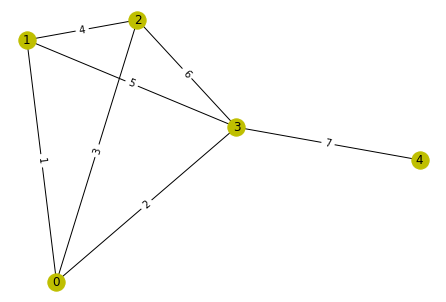

In [ ]:
# Undirected graph equipped with several common algorithms
# Included algorithms:
#   Depth first search
#   Breadth first search
#   Dijkstra's shortest path algorithm
#   Floyd-Warshall algorithm for all-pairs shortest path
#   Kruskal's MST algorithm
class Graph:
    # Graph initialization specified by # of its vertices
    def __init__(self, n):
        self.V = [[] for _ in range(n)]
        self.E = {}
        self.n = n
 
    # Add edge (u, v) with weight w
    def add_edge(self, u, v, w):
        self.V[u].append(v)
        self.V[v].append(u)
        self.E[(u, v)] = self.E[(v, u)] = w
 
    # Recursively apply function f to vertices in a connected component
    def _dfs(self, u, f, visited):
        visited[u] = True
        f(u)
        for v in self.V[u]:
            if not visited[v]:
                self._dfs(v, f, visited)
 
    # Traverse the graph with dfs
    def dfs(self, f):
        visited = [False] * self.n
        for u in range(self.n):
            if not visited[u]:
                self._dfs(u, f, visited)
 
    # Traverse a connected component with bfs
    def _bfs(self, u, f, visited):
        q = Queue()
        q.enqueue(u)
        visited[u] = True
        while not q.is_empty():
            u = q.dequeue()
            f(u)
            for v in self.V[u]:
                if not visited[v]:
                    q.enqueue(v)
                    visited[v] = True
 
    # Traverse the graph with bfs
    def bfs(self, f):
        visited = [False] * self.n
        for v in range(self.n):
            if not visited[v]:
                self._bfs(v, f, visited)
 
    # Find the shortest path between vertex u and all other vertices,
    # assuming connectivity of the graph
    def dijkstra(self, u):
        h = Heap()
        visited = [False] * self.n
        # Initialize heap with (0, u) and (inf, v) for v != u
        for v in range(self.n):
            h.push([float('inf'), v])
        h.decrease_key(u, 0)
        # Initialize all lengths to inf and previous vertex to -1
        dist = [float('inf')] * self.n
        dist[u] = 0
        pre = [-1] * self.n
        while not h.is_empty():
            k, u = h.pop()
            visited[u] = True
            for v in self.V[u]:
                # Only check neighbors that are in the heap
                if not visited[v] and k + self.E[(u, v)] < dist[v]:
                    dist[v] = k + self.E[(u, v)]
                    h.decrease_key(v, dist[v])
                    pre[v] = u
        return dist, pre
 
    # Floyd-Warshall algorithm for all pairs shortest path
    def fw(self):
        # Shape of dist is (n+1) * n * n
        dist = [[[float('inf')] * self.n for _ in range(self.n)] for _ in
                range(self.n + 1)]
        # Initial dist(i, j, 0) = E[(i, j)] if i and j is connected,
        #                         inf otherwise
        for i in range(self.n):
            dist[0][i][i] = 0
            for j in self.V[i]:
                dist[0][i][j] = self.E[(i, j)]
        # dist(i, j, k+1) = min{dist(i, j, k),
        #                       dist(i, K+1, k) + dist(K+1, j, k)}
        for k in range(1, self.n+1):
            for i in range(self.n):
                for j in range(self.n):
                    dist[k][i][j] = min(dist[k-1][i][j], dist[k-1][i][k-1] +
                            dist[k-1][k-1][j])
        return dist[self.n]
 
    # Kruskal's algorithm to find a minimum spanning tree
    # The MST is represented by a set of edges
    def kruskal(self):
        # self.E contains two copies of each edge
        # Only one copy is needed
        edges = sorted([e for e in self.E if e[0] < e[1]],
                key=lambda x: self.E[x])
        mst = []
        sets = Disjoint(self.n)
        for e in edges:
            # Find the lightest edge connecting two disjoint components
            if sets.find(e[0]) != sets.find(e[1]):
                sets.union(*e)
                mst.append(e)
        return mst
 
# Build a toy graph
g = Graph(5)
g.add_edge(0, 1, 1)
g.add_edge(0, 2, 3)
g.add_edge(0, 3, 2)
g.add_edge(1, 2, 4)
g.add_edge(1, 3, 5)
g.add_edge(2, 3, 6)
g.add_edge(3, 4, 7)
 
# Run dfs to print all vertices
from functools import partial
print('Traversal of the graph:', end=' ')
g.dfs(partial(print, end=' -> '))
print('\n')
 
# Run dijkstra to get shortest paths from vertex 0 to other vertices
dist, pre = g.dijkstra(0)
print('\n'.join('dist(0, %d) = %d' % (i, u) for i, u in enumerate(dist)))
print()
 
# Run floyd-warshall to find all pairs shortest path
dist = g.fw()
print(('dist' + '\t%d'*5) % tuple(range(5)))
for i in range(5):
    print(('%d' + '\t%d'*5) % (i, *dist[i]))
print()
 
# Run kruskal to find a mst
print('Edge set of an MST:', g.kruskal())
 
# Draw the graph
import networkx as nx
 
print('\nIllustration of the graph:')
G = nx.Graph({i: g.V[i] for i in range(5)})
G.add_weighted_edges_from((*e, g.E[e]) for e in g.E)
pos = nx.spring_layout(G, seed=50)
nx.draw(G, pos=pos, with_labels=True, node_color='y')
_ = nx.draw_networkx_edge_labels(G, pos=pos,
        edge_labels=nx.get_edge_attributes(G, 'weight'))